In [1]:
from IPython.core.display import display
import numpy as np
from sympy import *
init_printing()
# import math
from math import *
from interval import interval
from interval import imath as im
import sys
from pprint import pprint

連立方程式の解


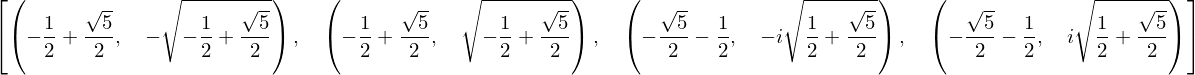

-- Jacobian of f --


In [2]:
x_1, x_2, x_3 = var("x_1 x_2 x_3")
f_1 = symbols("f_1", cls=Function)
f_2 = symbols("f_2", cls=Function)

f_1 = x_1**2 + x_2**2 - 1
f_2 = x_1 - x_2**2
display(f_1)
display(f_2)
print '連立方程式の解'
display(solve([eval(str(f_1)), eval(str(f_2))], [x_1,x_2]))

f_grad_symbol = []
f_grad = []
for f in ['f_1','f_2']:
    for x in ['x_1', 'x_2']:
        grad_symbol = eval(f).diff(eval(x))
        grad = lambda x_1,x_2: eval(str(grad_symbol))
        f_grad_symbol.append(grad_symbol)
        f_grad.append(grad)

f_grad_symbol = np.array(f_grad_symbol).reshape(2,2)
f_grad = np.array(f_grad).reshape(2,2)

def print_symbol_in_numpy(mat, print_description=''):
    print print_description
    for row in mat:
        display(list(row))

        
print_symbol_in_numpy(f_grad_symbol,'-- Jacobian of f --')



In [3]:
A = np.array([[3,1],[3,2]])
b = np.array([1,0])
Y = np.linalg.pinv(A)

Y = np.array([[0.6,-0.3],[-1,1]])
display(Y)
np.dot(Y,A)
E = np.eye(2) - np.dot(Y,A)
display(E)

print '--- norm ---'
norm = lambda x : np.linalg.norm(x, np.inf)
print np.dot(Y,b)
print norm(np.dot(Y,b))

print '--'*10
X_0 = np.array([interval[-1,1]*norm(np.dot(Y,b))/(1-norm(E)) for i in range(2)])#.astype(interval)
print X_0
print X_0.shape
X_0 = X_0 * interval[1,-1]

print X_0
print X_0.shape
print X_0[0][0]
print '-------------'

print E

# print interval(np.dot(E,X_0[0]))
# print type(interval[1,2])
# #func = np.vectorize(lambda x: interval(x))
# A = A.astype(interval)
# print(A[0][0])
# print

array([[ 0.6, -0.3],
       [-1. ,  1. ]])

array([[ 0.1,  0. ],
       [ 0. ,  0. ]])

--- norm ---
[ 0.6 -1. ]
1.0
--------------------
[[[-1.11111111  1.11111111]]

 [[-1.11111111  1.11111111]]]
(2, 1, 2)
[[[ 1.11111111  1.11111111]]

 [[ 1.11111111  1.11111111]]]
(2, 1, 2)
[ 1.11111111  1.11111111]
-------------
[[ 0.1  0. ]
 [ 0.   0. ]]


## Krawczyk methodによる線形方程式

### $Ax = b$を解く
- $Y \simeq A^{-1}, E = I - YA$
- $X^{(k+1)} = \{Yb + EX^{(k)}\} \cap X^{(k)}$, where $X^{(0)}_i  =  [-1,1] \|Yb\|  /  (1-\|E\|)$ $(i = 1,...,n)$

In [4]:
def linear_equation_by_krawczyk(A,b,Y=None):
    """
    A = np.array([[3,1],[3,2]])
    b = np.array([1,0])
    Y ~= A^{-1}
    """
    def dot(x,y):
        mat = [[0]*len(y[0]) for i in range(len(x))]
        for i in range(len(x)):
            for j in range(len(y[0])):
                sum = 0
                for k in range(len(x[0])):
                    sum = sum + x[i][k] * y[k][j]
                mat[i][j] = sum
        return mat

    def add(x,y):
        res = map(lambda a: a[0][0]+a[1][0], zip(x,y))
        return map(lambda x: [x], res)

    def iteration(Y,b, E, X):
        left = np.dot(Y,b).reshape(len(X),1).tolist()
        right = dot(E.tolist(), X)
        NX = add(left, right)
        return map(lambda (x,y): [x[0]&y[0]], zip(NX,X_0))
    
    norm = lambda x : np.linalg.norm(x, np.inf)
    f_num = A.shape[0]
    variable_num = A.shape[1]
    if Y is None:
         Y = np.around(np.linalg.pinv(A), decimals=2)
    E = np.eye(f_num) - np.dot(Y,A)
    X_0 = [[interval[-1,1] * norm(np.dot(Y,b)) / (1 - norm(E))] for i in range(variable_num)]

    next_X = X_0
    for i in range(5):
        #print i, next_X
        print 'iteration times : %d'  % i
        pprint(next_X)
        print
        next_X = iteration(Y, b, E, next_X)

In [5]:
A = np.array([[3,1],[3,2]])
b = np.array([1,0])
#Y = np.linalg.pinv(A)

Y = np.array([[0.6,-0.3],[-1,1]])
X_0 = [[interval[-1,1]*norm(np.dot(Y,b))/(1-norm(E))] for i in range(2)]
print X_0

linear_equation_by_krawczyk(A,b,Y)

[[interval([-1.1111111111111114, 1.1111111111111114])], [interval([-1.1111111111111114, 1.1111111111111114])]]
iteration times : 0
[[interval([-1.1111111111111114, 1.1111111111111114])],
 [interval([-1.1111111111111114, 1.1111111111111114])]]

iteration times : 1
[[interval([0.4888888888888887, 0.7111111111111112])], [interval([-1.0])]]

iteration times : 2
[[interval([0.6488888888888888, 0.6711111111111112])], [interval([-1.0])]]

iteration times : 3
[[interval([0.6648888888888889, 0.6671111111111112])], [interval([-1.0])]]

iteration times : 4
[[interval([0.6664888888888889, 0.6667111111111113])], [interval([-1.0])]]



#### http://youngleaf.web.fc2.com/m-1/m-1-4-siki/m1-4-4.html 問題4

In [6]:
A = np.array([[1,-1,1],[2,1,-3],[3,2,-1]])
b = np.array([-5,19,16])
linear_equation_by_krawczyk(A,b)
    

iteration times : 0
[[interval([-4.104166666666667, 4.104166666666667])],
 [interval([-4.104166666666667, 4.104166666666667])],
 [interval([-4.104166666666667, 4.104166666666667])]]

iteration times : 1
[[interval([1.9379166666666665, 2.1020833333333337])],
 [interval([2.7258333333333336, 3.0541666666666676])],
 [interval([-4.022083333333333, -3.857916666666667])]]

iteration times : 2
[[interval([1.9991583333333334, 2.002441666666667])],
 [interval([2.9945958333333333, 3.0028041666666674])],
 [interval([-4.001241666666666, -3.997958333333332])]]

iteration times : 3
[[interval([1.9999791666666666, 2.000044833333334])],
 [interval([2.9999087083333333, 3.0000892916666673])],
 [interval([-4.000036833333333, -3.9999711666666657])]]

iteration times : 4
[[interval([1.9999994233333334, 2.0000007366666672])],
 [interval([2.9999983820833336, 3.000002157916667])],
 [interval([-4.000000816666666, -3.999999503333332])]]



In [7]:
class Person(object):
    def __init__(self):
        self.name = 'taro'
        self.age = 10
    def __add__(self, other):
        return self.age + other.age

p1 = Person()
p2 = Person()
print p1 + p2

a = np.array([Person(), Person()], dtype=Person)
b = np.array([Person(), Person()], dtype=Person)
print a + b
print
print a
print a.dtype
print a[0]
a

20
[20 20]

object


array([<__main__.Person object at 0x105cba510>,
       <__main__.Person object at 0x105cba690>], dtype=object)

In [8]:
print interval[1,2]
inter1 = interval[1,2]
inter2 = interval[2,3]
print [inter1, inter2]
a = np.array([inter1, inter2], dtype=object)
print a
print a.shape
b =a*2
print '--- b -----'
print b

interval([1.0, 2.0])
[interval([1.0, 2.0]), interval([2.0, 3.0])]
[[[1.0 2.0]]

 [[2.0 3.0]]]
(2, 1, 2)
--- b -----
[[[2.0 4.0]]

 [[4.0 6.0]]]


In [9]:
class owl(object):
    pass

c = np.empty(4, dtype=owl)
c

array([None, None, None, None], dtype=object)